# The Solow Model with Human Capital

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from scipy import linalg
from types import SimpleNamespace
import pandas as pd 
import matplotlib.pyplot as plt
import ipywidgets 


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# We import our own code from the ModelProject.py file
from modelprojectREAL import SolowModelClass 
#We import our model
model = SolowModelClass()



In [2]:
model.Nullclines()


interactive(children=(FloatSlider(value=0.25, description='s_K', max=1.0, min=0.01, step=0.01), FloatSlider(va…

In [6]:
from modelprojectREAL import SolowGeneral
modelreg = SolowGeneral()
modelreg.steadystate_value()

7.952238885017917

In [4]:
from modelprojectREAL import SimulationClass
simulation = SimulationClass()

simulation.simulate(interactive=True, periods=500)

interactive(children=(FloatSlider(value=0.25, description='s_K', max=0.5, min=0.01, step=0.01), FloatSlider(va…

<function modelprojectREAL.SimulationClass._create_s_H_plot.<locals>.update_simulation(s_K, s_H)>

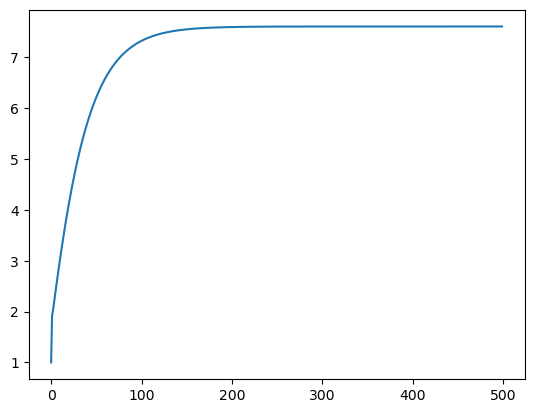

In [1]:
from modelprojectREAL import SolowGeneral
modelreg = SolowGeneral()
modelreg.simproduction()

In [3]:
modelreg.simulate_interactively()

AttributeError: 'SolowGeneral' object has no attribute 'simulate_interactively'